## Leaf classification project

### Goal for this projects: To successfully Identify plant types by passing leaf images and achieve over 90.5% accuracy rate.

### Open and explore image dataset

In [20]:
# Open image file and check image sizes
from PIL import Image
import os

size ={}
ds_path ='D:/Python/Leaves'
dirs =os.listdir(ds_path)
for images in dirs :
    im =Image.open(ds_path +'/' + images)
    witdth, height = im.size
    size[images] =[witdth, height]

print(size)

{'1001.jpg': [1600, 1200], '1002.jpg': [1600, 1200], '1003.jpg': [1600, 1200], '1004.jpg': [1600, 1200], '1005.jpg': [1600, 1200], '1006.jpg': [1600, 1200], '1007.jpg': [1600, 1200], '1008.jpg': [1600, 1200], '1009.jpg': [1600, 1200], '1010.jpg': [1600, 1200], '1011.jpg': [1600, 1200], '1012.jpg': [1600, 1200], '1013.jpg': [1600, 1200], '1014.jpg': [1600, 1200], '1015.jpg': [1600, 1200], '1016.jpg': [1600, 1200], '1017.jpg': [1600, 1200], '1018.jpg': [1600, 1200], '1019.jpg': [1600, 1200], '1020.jpg': [1600, 1200], '1021.jpg': [1600, 1200], '1022.jpg': [1600, 1200], '1023.jpg': [1600, 1200], '1024.jpg': [1600, 1200], '1025.jpg': [1600, 1200], '1026.jpg': [1600, 1200], '1027.jpg': [1600, 1200], '1028.jpg': [1600, 1200], '1029.jpg': [1600, 1200], '1030.jpg': [1600, 1200], '1031.jpg': [1600, 1200], '1032.jpg': [1600, 1200], '1033.jpg': [1600, 1200], '1034.jpg': [1600, 1200], '1035.jpg': [1600, 1200], '1036.jpg': [1600, 1200], '1037.jpg': [1600, 1200], '1038.jpg': [1600, 1200], '1039.jpg':

In [21]:
import pandas as pd
df =pd.DataFrame.from_dict(size,orient='index')
df.describe()

,0,1
count,1907.0,1907.0
mean,1600.0,1200.0
std,0.0,0.0
min,1600.0,1200.0
25%,1600.0,1200.0
50%,1600.0,1200.0
75%,1600.0,1200.0
max,1600.0,1200.0


All images are in 1600*1200 size

### Extract image labels from the website

In [1]:
import requests
import lxml.html as lh

In [2]:
url ='http://flavia.sourceforge.net'
response =requests.get(url)

# store the contetts under doc
doc = lh.fromstring(response.content)

#parse data between <tr> ...</tr> of HTML
tr_elements =doc.xpath('//tr')

# check the length of the first 12rows
[len(i) for i in tr_elements[:12]]


[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]

In [3]:
# Parse table header
col=[]
i=0
for j in tr_elements[0] :
    i += 1
    name = j.text_content()
    print(i,name)
    col.append((name,[]))
    


1 label
2 Scientific Name
3 Common Name(s)
4 filename
5 URL


In [4]:
# create Data Frame
for j in range(1,len(tr_elements)) :
    T = tr_elements[j]
    
    # only take the conets has the normal length 5
    if len(T) != 5 :
        break
    i =0
    for t in T.iterchildren() :
        data = t.text_content()
        
        if i>0 :
            try:
                data=int(data)
            except:
                pass
        col[i][1].append(data)
        i += 1
        

In [5]:
# check if each 
[len(i) for i in col]

[2, 2, 2, 2, 2]

In [11]:
Dict={ title:column for (title,column) in col }
table = pd.DataFrame(Dict)

In [9]:
table.head()
table.describe()

,label,Scientific Name,Common Name(s),filename,URL
count,32,32,32,32,32
unique,32,32,32,32,32
top,3,Manglietia fordiana Oliv.,Japan Arrowwood,2166-2230,http://www.itis.gov/servlet/SingleRpt/SingleRp...
freq,1,1,1,1,1


In [10]:
table['from'] = [int(i.rsplit("-")[0]) for i in table['filename']]
table['end'] =[int(i.rsplit("-")[1]) for i in table['filename']]
table.head()

,label,Scientific Name,Common Name(s),filename,URL,from,end
0,1,Phyllostachys edulis (Carr.) Houz.,pubescent bamboo,1001-1059,http://www.itis.gov/servlet/SingleRpt/SingleRp...,1001,1059
1,2,Aesculus chinensis,Chinese horse chestnut,1060-1122,http://www.ars-grin.gov/cgi-bin/npgs/html/taxo...,1060,1122
2,3,Berberis anhweiensis Ahrendt,Anhui Barberry,1552-1616,http://asaweb.huh.harvard.edu:8080/databases/s...,1552,1616
3,4,Cercis chinensis,Chinese redbud,1123-1194,http://www.ag.auburn.edu/hort/landscape/dbpage...,1123,1194
4,5,Indigofera tinctoria L.,true indigo,1195-1267,http://www.itis.gov/servlet/SingleRpt/SingleRp...,1195,1267


In [11]:
table['Common Name(s)'] =[ i.replace(" ","_") for i in table['Common Name(s)']]
table.head()

,label,Scientific Name,Common Name(s),filename,URL,from,end
0,1,Phyllostachys edulis (Carr.) Houz.,pubescent_bamboo,1001-1059,http://www.itis.gov/servlet/SingleRpt/SingleRp...,1001,1059
1,2,Aesculus chinensis,Chinese_horse_chestnut,1060-1122,http://www.ars-grin.gov/cgi-bin/npgs/html/taxo...,1060,1122
2,3,Berberis anhweiensis Ahrendt,Anhui_Barberry,1552-1616,http://asaweb.huh.harvard.edu:8080/databases/s...,1552,1616
3,4,Cercis chinensis,Chinese_redbud,1123-1194,http://www.ag.auburn.edu/hort/landscape/dbpage...,1123,1194
4,5,Indigofera tinctoria L.,true_indigo,1195-1267,http://www.itis.gov/servlet/SingleRpt/SingleRp...,1195,1267


In [12]:
table.head(33)

,label,Scientific Name,Common Name(s),filename,URL,from,end
0,1,Phyllostachys edulis (Carr.) Houz.,pubescent_bamboo,1001-1059,http://www.itis.gov/servlet/SingleRpt/SingleRp...,1001,1059
1,2,Aesculus chinensis,Chinese_horse_chestnut,1060-1122,http://www.ars-grin.gov/cgi-bin/npgs/html/taxo...,1060,1122
2,3,Berberis anhweiensis Ahrendt,Anhui_Barberry,1552-1616,http://asaweb.huh.harvard.edu:8080/databases/s...,1552,1616
3,4,Cercis chinensis,Chinese_redbud,1123-1194,http://www.ag.auburn.edu/hort/landscape/dbpage...,1123,1194
4,5,Indigofera tinctoria L.,true_indigo,1195-1267,http://www.itis.gov/servlet/SingleRpt/SingleRp...,1195,1267
5,6,Acer Palmatum,Japanese_maple,1268-1323,http://en.wikipedia.org/wiki/Acer_palmatum,1268,1323
6,7,Phoebe nanmu (Oliv.) Gamble,Nanmu,1324-1385,http://www.ars-grin.gov/cgi-bin/npgs/html/taxo...,1324,1385
7,8,Kalopanax septemlobus (Thunb. ex A.Murr.) Koidz.,castor_aralia,1386-1437,http://www.itis.gov/servlet/SingleRpt/SingleRp...,1386,1437
8,9,Cinnamomum japonicum Sieb.,Chinese_cinnamon,1497-1551,http://en.wikipedia.org/wiki/Cinnamomum_japonicum,1497,1551
9,10,Koelreuteria paniculata Laxm.,goldenrain_tree,1438-1496,http://www.itis.gov/servlet/SingleRpt/SingleRp...,1438,1496


### Create labeled folders

In [13]:
# crate the main folder where to store labeled folders

import os
path ='D:/Python/Leaves-m'
#os.makedirs(path, exist_ok=True)


try:
    os.mkdir(path)
except OSError:
    print("fail")
else :
    print('Success!')

fail


In [14]:
# create labeled folders
for plant in table['Common Name(s)']:
    try:
        os.mkdir(path + "/" +plant)
    except OSError :
        print(plant, "fail")
    else:
        print('Success!')

pubescent_bamboo fail
Chinese_horse_chestnut fail
Anhui_Barberry fail
Chinese_redbud fail
true_indigo fail
Japanese_maple fail
Nanmu fail
castor_aralia fail
Chinese_cinnamon fail
goldenrain_tree fail
Big-fruited_Holly fail
Japanese_cheesewood fail
wintersweet fail
camphortree fail
Japan_Arrowwood fail
sweet_osmanthus fail
deodar fail
ginkgo,_maidenhair_tree fail
Crape_myrtle,_Crepe_myrtle fail
oleander fail
yew_plum_pine fail
Japanese_Flowering_Cherry fail
Glossy_Privet fail
Chinese_Toon fail
peach fail
Ford_Woodlotus fail
trident_maple fail
Beale's_barberry fail
southern_magnolia fail
Canadian_poplar fail
Chinese_tulip_tree fail
tangerine fail


### Copy files into each labeled folder

In [4]:
import shutil

list1 =[]
x= table[['Common Name(s)','from','end']]

for index, row in x.iterrows() :
    plantname = row['Common Name(s)']
    fromm = row['from']
    end = row['end']
    files = [i for i in dirs if (int(i.rsplit(".")[0])>=fromm) and (int(i.rsplit(".")[0])<= end)]
    for j in files :
        shutil.copy(ds_path +'/'+j,path +'/'+ plantname+'/'+ j)


### Check the dataset

In [16]:
plant_data = {}
for root, dirs, files in os.walk("D:/Python/Leaves-m"):
    for name in dirs :
        for root1, dirs1, files1 in os.walk("D:/Python/Leaves-m/{}".format(name)):
            plant_data[name] = len(files1)

plant_data =pd.DataFrame.from_dict(plant_data,orient='index',columns =["total_image"])
plant_data.sum()

total_image    1907
dtype: int64

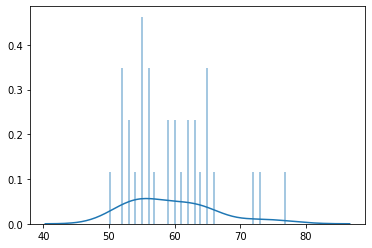

In [17]:
import seaborn as sns
sns.distplot(plant_data, bins =100)

In [18]:
plant_data.describe()

,total_image
count,32.000000
mean,59.593750
std,6.564122
min,50.000000
25%,55.000000
50%,59.000000
75%,63.250000
max,77.000000


### Image rotation

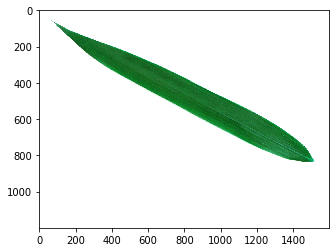

In [15]:
# Testing image rotation
# reference https://stackoverflow.com/questions/53106780/specify-background-color-when-rotating-an-image-using-opencv-in-python

import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.util import random_noise

test_image = r'D:\Python\Leaves\1001.jpg'

main_img =cv2.imread(test_image)
plt.imshow(main_img)

In [16]:
print(main_img.shape[0])

1200


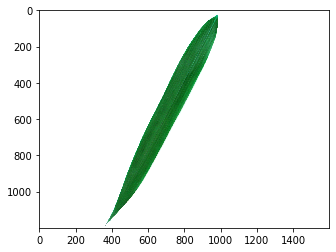

In [5]:
h= main_img.shape[0]
w =main_img.shape[1]

# rotate from the center of image
img_center = (w/2, h/2)

# rotate 90 degree and scale down to 0.8 to ensure have whole image
M = cv2.getRotationMatrix2D(img_center,90,0.8)

rotated_image =cv2.warpAffine(main_img,M,(1600,1200),borderMode=cv2.BORDER_CONSTANT, borderValue =(255,255,255) )
# noise_image =cv2.randn(rotated_image.copy(),0,(300,300,300))  
# new_image =rotated_image + noise_image

plt.imshow(rotated_image)


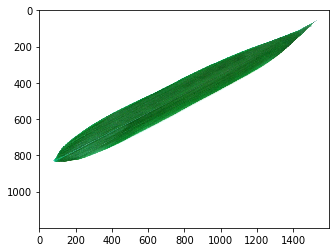

In [6]:

flip = cv2.flip(main_img,1)
plt.imshow(flip)


In [4]:
# create a function to get the list of name from the path
import random 
def get_files_from_folder(path):
    name=[]
    for root, dirs, files in os.walk(path) :
        name.append(files)
    name =name[0]
    random.shuffle(name)
    return np.asarray(name)

In [5]:
# cretae a function to rotate images to make each class to have 1000 images

import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.util import random_noise

def rotate_noise_image(scr, des):
    root,dirs,_=next(os.walk(scr))
    
    for i in range(len(dirs)):
        path = os.path.join(root,dirs[i])
        save_path =os.path.join(des,dirs[i])
        file = get_files_from_folder(path)
        (x, y) =divmod(1000,len(file))
        degree_list = [ 0+350//x*i for i in range(1,x+1)]
        
        #creates dir
        if not os.path.exists(save_path):
            os.makedirs(save_path)
        
        for q in range(y):  
         # flip image
            main_img = cv2.imread(os.path.join(path,file[q]))
            flip = cv2.flip(main_img,1)
            cv2.imwrite(save_path+'/'+file[q].rsplit(".")[0]+'_flip.jpg',flip)
        
        
        for j in range(len(file)) :
            main_img = cv2.imread(os.path.join(path,file[j]))
            h= main_img.shape[0]
            w =main_img.shape[1]
            
            # rotate from the center of image
            img_center = (w/2, h/2)
            for dg in degree_list:
                
                M = cv2.getRotationMatrix2D(img_center,dg,0.8)

                rotated_image =cv2.warpAffine(main_img,M,(1600,1200),borderMode=cv2.BORDER_CONSTANT, borderValue =(255,255,255) )
#                 noise_image =cv2.randn(rotated_image.copy(),0,(300,300,300))  
#                 new_image =rotated_image + noise_image
                cv2.imwrite(save_path+'/'+file[j].rsplit(".")[0]+'_'+str(dg)+'.jpg', rotated_image)

In [28]:
rotate_noise_image(r'D:\Python\Leaves-m',r'D:\Python\Leaves_final_v4')

### Train-validation-blind split for images

In [6]:
import shutil
import os
import numpy as np

In [8]:
###  crate a function for creating blind dataset
import glob

def create_valid_img(scr_folder, dest_folder, valid_ratio):

    for clas in glob.glob(scr_folder + "/*") :
        class_name = clas.rsplit('\\')[-1]
        files =get_files_from_folder(clas)
        nb_valid_file = int(np.round(len(files)*valid_ratio))
        
        for i in range(nb_valid_file) :
            
            dst = dest_folder +'/'+class_name +'/'+ files[i]
            src = os.path.join(clas, files[i])
                      
            if not os.path.exists(os.path.join(dest_folder+class_name)):
                os.makedirs(os.path.join(dest_folder+class_name))
            
            shutil.copy(src, dst)    
    

In [50]:
create_valid_img('D:/Python/Leaves_final_v4/','D:/Python/leaves_blind/',0.2)

In [9]:
# create a function for creating test and validation dataset
def split(path_to_data,path_to_train_data,path_to_test_data, train_ratio):
    
    # get dirs
    _, dirs, _ = next(os.walk(path_to_data))

    # calculates how many train data per class
    data_counter_per_class = np.zeros((len(dirs)))
    

    for i in range(len(dirs)):
        path = os.path.join(path_to_data, dirs[i])
        files_all = list(get_files_from_folder(path))
        files_valid =list(get_files_from_folder('D:/Python/leaves_blind/'+dirs[i]))
        files = set(files_all) -set(files_valid)
        files =list(files)

        data_counter_per_class[i] = len(files)
    
    test_counter = np.round(data_counter_per_class * (1 - train_ratio))
    # transfers files
    for i in range(len(dirs)):
        path_to_original = os.path.join(path_to_data, dirs[i])
        path_to_test = os.path.join(path_to_test_data, dirs[i])
        path_to_train = os.path.join(path_to_train_data, dirs[i])

        #creates dir
        if not os.path.exists(path_to_test):
            os.makedirs(path_to_test)
        if not os.path.exists(path_to_train):
            os.makedirs(path_to_train)
        files = get_files_from_folder(path_to_original)
        # moves data
        for j in range(int(test_counter[i])):
            dst_test = os.path.join(path_to_test ,files[j])
            src = os.path.join(path_to_original, files[j])
            shutil.copy(src, dst_test)
        for j in range(int(test_counter[i]),len(files)):
            dst_train = os.path.join(path_to_train ,files[j])
            src = os.path.join(path_to_original, files[j])
            shutil.copy(src, dst_train)
            

In [81]:
split("D:/Python/Leaves_final_v4","D:/Python/Leaves_v4/train","D:/Python/Leaves_v4/test",0.75)

In [15]:
plant_train = {}
for root, dirs, files in os.walk("D:/Python/Leaves_v4/train"):
    for name in dirs :
        for root1, dirs1, files1 in os.walk("D:/Python/Leaves_v4/train/{}".format(name)):
            plant_train[name] = len(files1)

plant_train =pd.DataFrame.from_dict(plant_train,orient='index',columns =["total_image"])
plant_train.describe()

,total_image
count,32.0
mean,800.0
std,0.0
min,800.0
25%,800.0
50%,800.0
75%,800.0
max,800.0


In [86]:
plant_test = {}
for root, dirs, files in os.walk("D:/Python/Leaves_v4/test"):
    for name in dirs :
        for root1, dirs1, files1 in os.walk("D:/Python/Leaves_v4/test/{}".format(name)):
            plant_test[name] = len(files1)

plant_test =pd.DataFrame.from_dict(plant_test,orient='index',columns =["total_image"])
plant_test.describe()

,total_image
count,32.0
mean,200.0
std,0.0
min,200.0
25%,200.0
50%,200.0
75%,200.0
max,200.0


### Convelutional neural network model building

Useful vedio to help understand how to use VGG16: https://www.youtube.com/watch?v=oDHpqu52soI

Explore defualt Vgg16 model layers

In [7]:
vgg16_model=keras.applications.vgg16.VGG16()

In [8]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [2]:
from keras.applications import vgg16
from keras.models import Model
import keras
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img 
import datetime
import time
from keras.utils.np_utils import to_categorical 

# Call vgg16 API and remove 3 fully-connected layers at the top of the network (dense and prediction layers)
vgg = vgg16.VGG16(include_top=False, weights='imagenet',  input_shape=(224,224,3))

# output for this model is the last layer 
output = vgg.layers[-1].output
# Flat the bottleneck fratures
output = keras.layers.Flatten()(output)
# Add vgg layers into model as vgg16 is a ieration type not 
vgg_model = Model(vgg.input, output)

# Iterator throught all layers to freeze first 3 block and train the last 2 blocks
vgg_model.trainable = True

set_trainable = False
for layer in vgg_model.layers:
    if layer.name in ['block5_conv1', 'block4_conv1']:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
    
import pandas as pd
pd.set_option('max_colwidth', -1)
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])   

Using TensorFlow backend.
C:\Users\jchqehsieh\AppData\Local\Continuum\anaconda3\envs\PythonCPU\lib\site-packages\ipykernel_launcher.py:32: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x000002064BD0BA08>,input_1,False
1,<keras.layers.convolutional.Conv2D object at 0x00000206546E3348>,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0x00000206546E3FC8>,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0x00000206547462C8>,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0x00000206547469C8>,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0x0000020654756648>,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0x0000020654756288>,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0x000002065475D488>,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0x0000020654763A88>,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0x00000206547687C8>,block3_conv3,False


Create our dense layer

In [43]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

input_shape = vgg_model.output_shape[1]

model = Sequential()
model.add(vgg_model)
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='softmax'))

# lr = learbing rate
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['accuracy'])
              


### Data Augmentation

Use ImageDataGeneration to create more dataset

In [33]:
gen= ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=22.45, fill_mode='nearest')

img_width, img_height = 224, 224 

train_data_dir = "D:/Python/Leaves_v4/train" 
validation_data_dir = "D:/Python/leaves_v4/test" 

In [38]:
# process training data
import numpy as np

train_generator_top = gen.flow_from_directory( 
   train_data_dir, 
   target_size=(img_width, img_height),
    class_mode='categorical'
   batch_size=10,
shuffle=False)

Found 25600 images belonging to 32 classes.


In [42]:
# process validation data
validation_generator_top = gen.flow_from_directory( 
   validation_data_dir, 
   target_size=(img_width, img_height), 
   batch_size=5, 
   class_mode='categorical', 
   shuffle=False) 

Found 6400 images belonging to 32 classes.


### Train the model

In [44]:
history = model.fit_generator(train_generator_top, steps_per_epoch=100, epochs=100,
                              validation_data=validation_generator_top , validation_steps=50, 
                              verbose=1)  

Epoch 1/100
100/100 [==============================] - 704s 7s/step - loss: 3.5244 - accuracy: 0.0410 - val_loss: 3.4146 - val_accuracy: 0.0000e+00
Epoch 2/100
100/100 [==============================] - 761s 8s/step - loss: 3.4819 - accuracy: 0.0560 - val_loss: 3.1586 - val_accuracy: 0.0160
Epoch 3/100
100/100 [==============================] - 701s 7s/step - loss: 3.3707 - accuracy: 0.0930 - val_loss: 3.6257 - val_accuracy: 0.0000e+00
Epoch 4/100
100/100 [==============================] - 659s 7s/step - loss: 3.1554 - accuracy: 0.1400 - val_loss: 3.8744 - val_accuracy: 0.0000e+00
Epoch 5/100
100/100 [==============================] - 662s 7s/step - loss: 3.1640 - accuracy: 0.1220 - val_loss: 3.2360 - val_accuracy: 0.0040
Epoch 6/100
100/100 [==============================] - 655s 7s/step - loss: 2.9131 - accuracy: 0.1970 - val_loss: 2.5976 - val_accuracy: 0.2080
Epoch 7/100
100/100 [==============================] - 655s 7s/step - loss: 2.7727 - accuracy: 0.2020 - val_loss: 2.9968 - v

if over fitting- Train is doing well but valid is not generate accurae prediction
1) adding more images , Data Augementation
2)reduce the layers of the model
3) reduce dense nnumber, simplfied the model
4) drop out, ignore some notes during the training
if underfitting- Train is not doing well
1) increase complexity of the mode , increase layers, dense, type of dense
2) add more featurues in the train data set ( for example, add more columns)
3) reduce drop out , as during validation it will not drop out the notes, so it is also a good fine tune to use when we see the validation data result is better than the training result




Start, stop and resume training
https://www.pyimagesearch.com/2019/09/23/keras-starting-stopping-and-resuming-training/

### Result

In [49]:
model.save('D:/Python/leave_model_v4/fine_tune_leaves_model.h5')
model.save_weights('D:/Python/leave_model_v4/fine_tune_leaves_model_weight.h5')
(eval_loss, eval_accuracy) = model.evaluate( 
    validation_generator_top,  verbose=1)
print('[INFO] accuracy: {:.2f}%'.format(eval_accuracy * 100)) 
print('[INFO] Loss: {}'.format(eval_loss)) 



1280/1280 [==============================] - 1987s 2s/step
[INFO] accuracy: 97.30%
[INFO] Loss: 0.03057742491364479


### Code for visualization of the Accuracy and Loss:

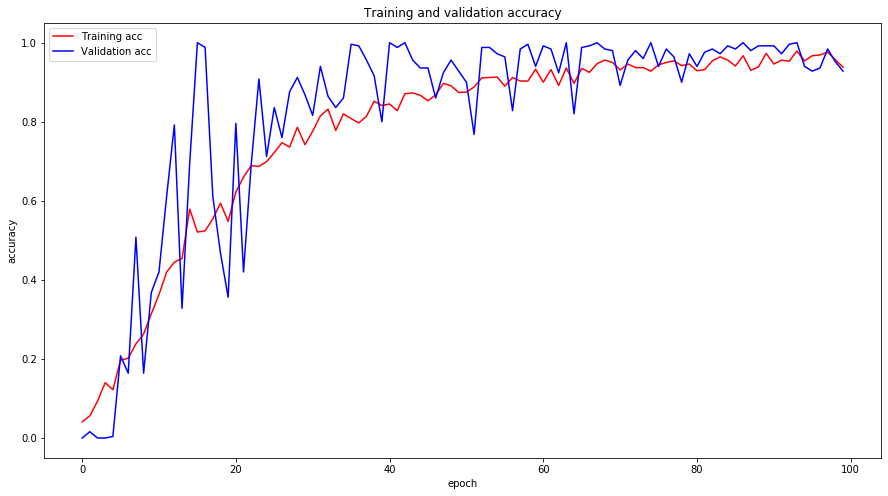

<Figure size 432x288 with 0 Axes>

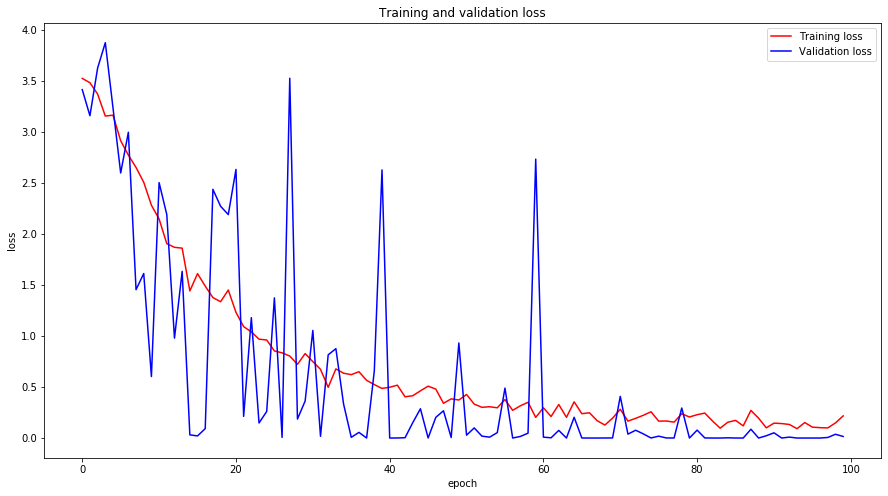

In [67]:
#Graphing our training and validation

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.figure(figsize=(15,8))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.figure(figsize=(15,8))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss') 
plt.xlabel('epoch')
plt.legend()
plt.show()

The result shows too less data, no enough images